In [55]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from collections import Counter

In [49]:
with open("firmendb_data/data_firmen.csv", encoding="utf-8") as f:
    df = pd.read_csv(f, delimiter=";")

df.head()

,Offizieller_Name,streetAddress,postalCode,addressLocality,Telefon,Email,Fax,Internet,Handelsregister,Rechtsform,...,Holding,Branche,Unternehmensgegendstand,Marken,Umsatzsteuer-Id,Mitarbeiter,Stammkapital,Umsatz,Börse,postOfficeBoxNumber
0,"Klein, Bertelt, Klein Rechtsanwälte in Partner...",Dillinger Strasse 18,66701,Beckingen,+49 (06835) 92351,info@rakbk.de,+49 (0681) 9235120,www.rakbk.de,"PR 81, Amtsgericht Saarbrücken",NaN,...,NaN,Rechtsanwälte und Anwaltskanzleien,Gegenstand des Unternehmens ist die gemeinscha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Puhl GmbH,Südstrasse 6,66701,Beckingen,+49 (06835) 9220 0,info@spedition-puhl.de,+49 (06835) 922020,www.puhl.eu,"HRB 63518, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Speditionen / Bauunternehmen,NaN,NaN,DE137970178,40 in Deutschland,NaN,NaN,NaN,NaN
2,Cass - Tech - GmbH,Kapellenstrasse 51,66701,Beckingen,+49 (06832) 8080530,info@cass-tech.de,+49 (06832) 8080529,www.cass-tech.de,"HRB 19163, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Stahlbau und Leichtmetallbau,Metallbau und Konstruktion.,NaN,NaN,NaN,25.000 Euro,NaN,NaN,NaN
3,Malermeister + Stuckateurbetrieb Arno Schorn GmbH,Auf Schlädt 24,66701,Beckingen,+49 (06832) 1314,info@malermeisterschorn.de,+49 (06832) 128300,www.malermeisterschorn.de,"HRB 18614, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Maler und Lackierer,Gegenstand des Unternehmens ist der Betrieb ei...,NaN,NaN,NaN,25.000 Euro,NaN,NaN,NaN
4,FST Logistik GmbH,Auf der Heide 46 b,66701,Beckingen,+49 (06832) 8080460,luttermann@fst-gmbh.de,+49 (06832) 80563,www.fst-gmbh.de,"HRB 18570, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Logistik,Gegenstand des Unternehmens ist die Durchführu...,NaN,NaN,NaN,25.000 Euro,NaN,NaN,NaN


In [51]:
df.shape

(17265, 28)

In [50]:
df.dtypes

Offizieller_Name            object
streetAddress               object
postalCode                   int64
addressLocality             object
Telefon                     object
Email                       object
Fax                         object
Internet                    object
Handelsregister             object
Rechtsform                  object
Hauptsitz                   object
Firmengründung             float64
Gründung                   float64
Inhaber                     object
Geschäftsführung            object
Vorstand                    object
Aufsichtsrat                object
Gesellschafter              object
Holding                     object
Branche                     object
Unternehmensgegendstand     object
Marken                      object
Umsatzsteuer-Id             object
Mitarbeiter                 object
Stammkapital                object
Umsatz                      object
Börse                       object
postOfficeBoxNumber         object
dtype: object

## Make dataset smaller

In [54]:
df = df.dropna(subset = ['Branche'], axis =0)
df = df.dropna(subset = ["Rechtsform"], axis=0)
df.shape

(14054, 28)

In [81]:
# df["Branche"].value_counts()["Vermögensberater und sonstige Vermögensberatung"]
branche_counts = df["Branche"].value_counts()
reduced_industries = branche_counts[branche_counts >= 100].index
reduced_industries

Index(['Verwaltung und Management von Unternehmen und Betrieben',
       'Dienstleistungen a.n.g.', 'Holding- und Beteiligungsgesellschaften',
       'Unternehmensberatung, Unternehmensberater',
       'Vermögensberater und sonstige Vermögensberatung',
       'Autohandel und Kfz-Handel (Nutzfahrzeuge, LKW etc.)',
       'Sachverständige', 'Immobilien-Verwaltung für Dritte',
       'Klempnerei, Gasinstallation, Wasserinstallation, Heizungsinstallation und Lüftungsinstallation',
       'Transporte, Güterbeförderung im Strassenverkehr',
       'Immobilien-Vermittlung für Dritte',
       'Verwaltung, Vermietung und Verpachtung von Immobilien',
       'Ingenieurbüros für technische Fachplanung', 'Werbung und Marketing',
       'Softwareberatung und Softwareentwicklung',
       'Hoch- und Tiefbau ohne ausgeprägten Schwerpunkt', 'Apotheken',
       'Handel mit Ersatzteilen und Zubehör für Autos, Nutzfahrzeuge, LKW etc.',
       'Elektroinstallation', 'Sonstige wirtschaftliche Dienstleistungen

In [82]:
df = df[df['Branche'].isin(reduced_industries)]
df["Rechtsform"].value_counts()

GmbH: Gesellschaft mit beschränkter Haftung                                                                           4024
GmbH + Co. KG: Gesellschaft mit beschränkter Haftung und Compagnie Kommanditgesellschaft                               622
UG (haftungsbeschränkt): Unternehmergesellschaft (haftungsbeschränkt)                                                  301
e.K.: Eingetragener Kaufmann/Eingetragene Kauffrau (auch e.Kfm. oder e.Kffr.)                                          283
AG: Aktiengesellschaft                                                                                                  61
KG: Kommanditgesellschaft                                                                                               40
OHG: Offene Handelsgesellschaft                                                                                         37
eG: Eingetragene Genossenschaft (auch e.G.)                                                                             25
Ltd.: Limited   

In [86]:
rechtsform_counts = df["Rechtsform"].value_counts()
reduced_rechtsform = rechtsform_counts[rechtsform_counts >= 10].index
df = df[df['Rechtsform'].isin(reduced_rechtsform)]
df.shape

(5432, 28)

## Assign integers to categorical data

In [87]:
d = dict()
for i, x in enumerate(df["Rechtsform"].unique()):
    d[x] = i
df['Rechtsform'] = df['Rechtsform'].map(d) # what happens with n/a's?

d = dict()
for i, x in enumerate(df["Branche"].unique()):
    d[x] = i
df["Branche"] = df["Branche"].map(d)

d = dict()
for i, x in enumerate(df["addressLocality"].unique()):
    d[x] = i
df["addressLocality"] = df["addressLocality"].map(d)

## Choose features and classes

In [88]:
# features
features = ["Branche", "Rechtsform"]
X = df[features] # maybe Stammkapital, Mitarbeiter, Umsatz
# target
y = df["addressLocality"]
print(X)
print(y)

       Branche  Rechtsform
3            0           0
5            1           1
6            2           0
7            3           0
11           4           0
...        ...         ...
17251       14           0
17253       13           0
17254       11           0
17255        6           0
17261       21           2

[5432 rows x 2 columns]
3         0
5         0
6         0
7         0
11        0
         ..
17251    51
17253    51
17254    51
17255    51
17261    51
Name: addressLocality, Length: 5432, dtype: int64


## Decision Tree

In [89]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

<Figure size 1440x1440 with 0 Axes>

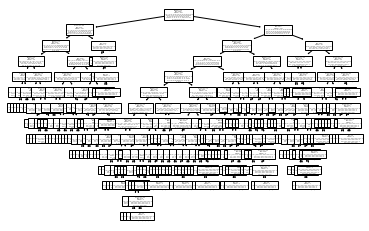

<Figure size 1440x1440 with 0 Axes>

In [95]:
tree.plot_tree(dtree, feature_names=features)
# plt.figure(figsize=(20,20)) 
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)

## Try to predict location